In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.table import Table
import spectral_cube
from astropy.io import fits
import pylab as plt
plt.style.use('dark_background')

In [2]:
%run ../coelho_model_paa/compile_coelho_models.py

[0.0, -4.641188913222645e-09, -8.420629421016431e-08, 4.565322092018655e-08, -4.232431720278943e-09, -2.778548562351272e-08]
[0.0, -8.423824753527264e-08, 1.4334462979808256e-08, -3.7970329417201715e-08, 2.0822357992532618e-08, 3.0377912849231746e-08]
[0.0, 8.974964083812052e-08, -7.925864499404094e-08, -8.712501253678953e-09, -6.1946538816775366e-09, -8.85658844985067e-09]
[0.0, 7.158249873058922e-08, 4.2929394095292874e-09, -4.750866869751945e-08, -1.2436057676914084e-09, 1.9368457389309454e-08]
[0.0, -7.795635358985627e-08, -8.991265828487743e-08, -3.977742122109919e-08, -1.2294323050103946e-08, -4.90432517334562e-09]


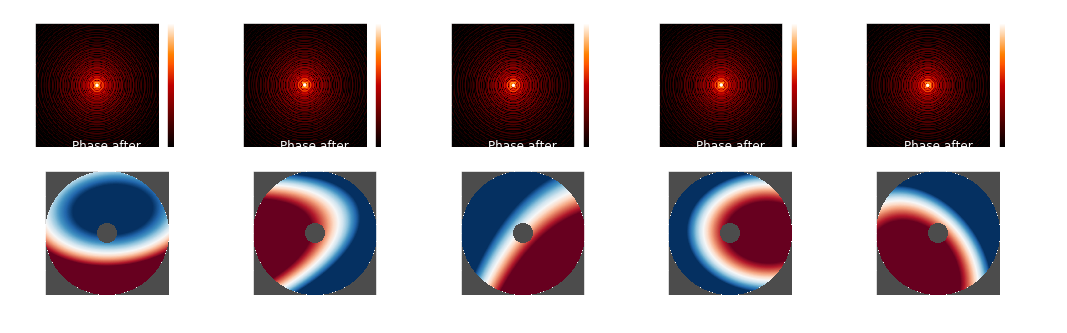

In [3]:
%run aperture_plane_model.py

In [22]:
def min_keys(jj, models_table, tbl):
    keys = []
    init_min = np.argmin(np.abs(models_table['logg'] - tbl['logg'][jj]))
    for ii in range(len(models_table)):
        if np.abs(models_table['logg'][ii] - tbl['logg'][jj]) == np.abs(models_table['logg'][init_min] - tbl['logg'][jj]):
            keys.append(ii)
    
    return keys

In [23]:
def closest_model(name, VVV=False):
    """"
    This assumes that we value logg being correct over teff.
    Unfortunately, trying to find the best fit from existing data requires us to use a strict poset.
    So one has to be prioritized over the other.
    """
    models_table = table.Table.read('coelho14_model_paa.fits')
    result = Table({'logg': [],
                    'teff': [],
    })
    data_stars = np.loadtxt('./TRILEGAL_data/' + name, unpack=True)
    logTe = []
    logg = []
    index = 13
    if VVV:
        index += 2

    for ii in range(len(data_stars[0])):
        if data_stars[index, ii] >= 16:
            logTe.append(data_stars[5, ii])
            logg.append(data_stars[6, ii])

    tbl = Table({'logTe': logTe,
                 'logg': logg,
                 })

    tbl.add_column(col=(10**tbl['logTe']), name='teff')

    for jj in range(len(tbl)):
        logg_keys = min_keys(jj=jj, models_table=models_table, tbl=tbl)
        
        small = np.argmin(np.abs(models_table['teff'][logg_keys] - tbl['teff'][jj]))
        corr = logg_keys[small]
        
        result.add_row([models_table['logg'][corr], models_table['teff'][corr]])

    return result

In [24]:
test = closest_model('stars0807202mass6.dat')

In [25]:
test

logg,teff
float64,float64
5.0,4000.0
4.5,6500.0
4.5,6250.0
4.5,5500.0
4.5,6000.0
4.5,5250.0
4.5,6750.0
4.5,6750.0
4.5,5500.0


In [6]:
fh = fits.open('./s_coelho14_sed/t03400_g+0.5_m13p04_sed.fits')

In [7]:
sp = lower_dimensional_structures.OneDSpectrum.from_hdu(fh)

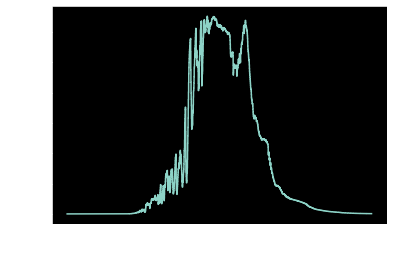

In [8]:
sp.quicklook()

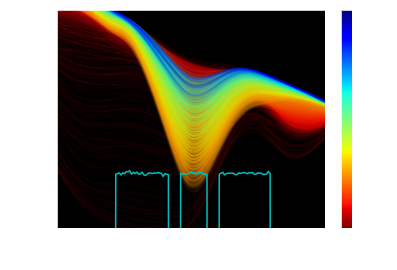

In [9]:
%run ../coelho_model_paa/coelho_specplot.py